In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use("ggplot")

In [63]:
monday = pd.read_csv("data/monday.csv", sep=";", parse_dates=["timestamp"])
tuesday = pd.read_csv("data/tuesday.csv", sep=";", parse_dates=["timestamp"])
wednesday = pd.read_csv("data/wednesday.csv", sep=";", parse_dates=["timestamp"])
thursday = pd.read_csv("data/thursday.csv", sep=";", parse_dates=["timestamp"])
friday = pd.read_csv("data/friday.csv", sep=";", parse_dates=["timestamp"])

In [64]:
frames = monday, tuesday, wednesday, thursday, friday
monday["day"] = "monday"
tuesday["day"] = "tuesday"
wednesday["day"] = "wednesday"
thursday["day"] = "thursday"
friday["day"] = "friday"

In [65]:
week = pd.concat(frames).reset_index()
week.head()

,index,timestamp,customer_no,location,day
0,0,2019-09-02 07:03:00,1,dairy,monday
1,1,2019-09-02 07:03:00,2,dairy,monday
2,2,2019-09-02 07:04:00,3,dairy,monday
3,3,2019-09-02 07:04:00,4,dairy,monday
4,4,2019-09-02 07:04:00,5,spices,monday


### Calculate the total number of customers in each section

In [66]:
monday_count = monday.groupby(['timestamp', "location"]).agg({"customer_no":"count"}).reset_index()
monday_count.rename(columns={"customer_no":"count"}, inplace=True)
monday_count.head()

,timestamp,location,count
0,2019-09-02 07:03:00,dairy,2
1,2019-09-02 07:04:00,dairy,2
2,2019-09-02 07:04:00,fruit,1
3,2019-09-02 07:04:00,spices,3
4,2019-09-02 07:05:00,checkout,2


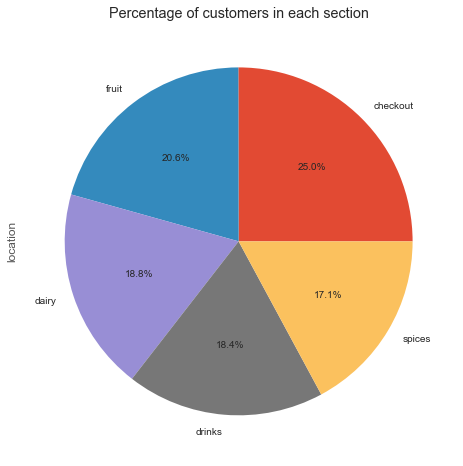

In [67]:
monday_count["location"].value_counts().plot(kind="pie", 
                                             autopct='%1.1f%%', 
                                             title="Percentage of customers in each section");

### Display cumulated number of customers in each section

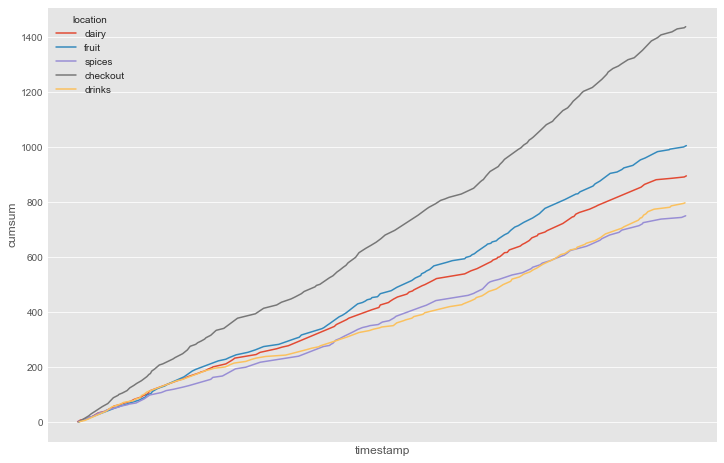

In [68]:
monday_count["cumsum"] = monday_count.groupby(["location"])["count"].cumsum()

fig = plt.figure()
plot_ = sns.lineplot(data=monday_count, x="timestamp", y="cumsum", hue="location");
fig.canvas.draw()
new_ticks = [i.get_text() for i in plot_.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 200), new_ticks[::200]);

### Display the number of customers at checkout over time

In [69]:
checked_out = monday_count[monday_count["location"]=="checkout"]

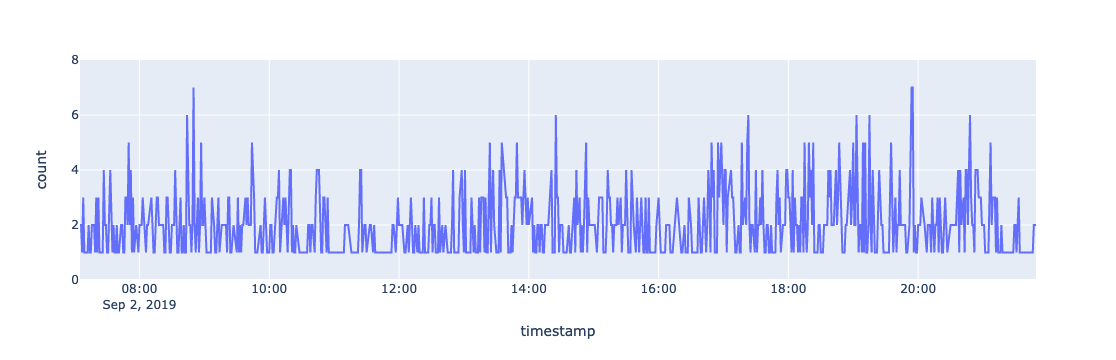

In [70]:
px.line(checked_out, x="timestamp", y="count", range_y=[0, 8])

### Calculate the time each customer spent in the market

In [179]:
week = pd.concat(frames).reset_index()
week.columns

Index(['index', 'timestamp', 'customer_no', 'location', 'day'], dtype='object')

In [180]:
week

,index,timestamp,customer_no,location,day
0,0,2019-09-02 07:03:00,1,dairy,monday
1,1,2019-09-02 07:03:00,2,dairy,monday
2,2,2019-09-02 07:04:00,3,dairy,monday
3,3,2019-09-02 07:04:00,4,dairy,monday
4,4,2019-09-02 07:04:00,5,spices,monday
...,...,...,...,...,...
24872,5120,2019-09-06 21:50:00,1500,dairy,friday
24873,5121,2019-09-06 21:50:00,1507,checkout,friday
24874,5122,2019-09-06 21:50:00,1508,checkout,friday
24875,5123,2019-09-06 21:50:00,1509,drinks,friday


In [198]:
customer_time = week.groupby(["customer_no", "day"])["timestamp"].min().reset_index().rename(columns={"timestamp":"start"})
customer_time["end"] = week.groupby(["customer_no", "day"])["timestamp"].max().reset_index()["timestamp"]

In [199]:
customer_time["time spend in min"] = (customer_time["end"] - customer_time["start"]).dt.seconds/60

In [200]:
customer_time

,customer_no,day,start,end,time spend in min
0,1,friday,2019-09-06 07:00:00,2019-09-06 07:05:00,5.0
1,1,monday,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
2,1,thursday,2019-09-05 07:00:00,2019-09-05 07:02:00,2.0
3,1,tuesday,2019-09-03 07:02:00,2019-09-03 07:12:00,10.0
4,1,wednesday,2019-09-04 07:00:00,2019-09-04 07:02:00,2.0
...,...,...,...,...,...
7440,1531,wednesday,2019-09-04 21:46:00,2019-09-04 21:49:00,3.0
7441,1532,thursday,2019-09-05 21:48:00,2019-09-05 21:48:00,0.0
7442,1533,thursday,2019-09-05 21:48:00,2019-09-05 21:48:00,0.0
7443,1534,thursday,2019-09-05 21:48:00,2019-09-05 21:49:00,1.0


In [210]:
customer_time["total time"] = customer_time.groupby("customer_no")["time spend in min"].transform(lambda x: sum(x))

In [211]:
customer_time

,customer_no,day,start,end,time spend in min,total time
0,1,friday,2019-09-06 07:00:00,2019-09-06 07:05:00,5.0,21.0
1,1,monday,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0,21.0
2,1,thursday,2019-09-05 07:00:00,2019-09-05 07:02:00,2.0,21.0
3,1,tuesday,2019-09-03 07:02:00,2019-09-03 07:12:00,10.0,21.0
4,1,wednesday,2019-09-04 07:00:00,2019-09-04 07:02:00,2.0,21.0
...,...,...,...,...,...,...
7440,1531,wednesday,2019-09-04 21:46:00,2019-09-04 21:49:00,3.0,6.0
7441,1532,thursday,2019-09-05 21:48:00,2019-09-05 21:48:00,0.0,0.0
7442,1533,thursday,2019-09-05 21:48:00,2019-09-05 21:48:00,0.0,0.0
7443,1534,thursday,2019-09-05 21:48:00,2019-09-05 21:49:00,1.0,1.0


In [216]:
week["time spend in min"] = week.groupby(["customer_no", "day"])["timestamp"].transform(lambda x: max(x) - min(x)).dt.seconds/60

### Calculate the total number of customers in the supermarket over time.

In [249]:
customer_time

,customer_no,day,start,end,time spend in min,total time
0,1,friday,2019-09-06 07:00:00,2019-09-06 07:05:00,5.0,21.0
1,1,monday,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0,21.0
2,1,thursday,2019-09-05 07:00:00,2019-09-05 07:02:00,2.0,21.0
3,1,tuesday,2019-09-03 07:02:00,2019-09-03 07:12:00,10.0,21.0
4,1,wednesday,2019-09-04 07:00:00,2019-09-04 07:02:00,2.0,21.0
...,...,...,...,...,...,...
7440,1531,wednesday,2019-09-04 21:46:00,2019-09-04 21:49:00,3.0,6.0
7441,1532,thursday,2019-09-05 21:48:00,2019-09-05 21:48:00,0.0,0.0
7442,1533,thursday,2019-09-05 21:48:00,2019-09-05 21:48:00,0.0,0.0
7443,1534,thursday,2019-09-05 21:48:00,2019-09-05 21:49:00,1.0,1.0


In [250]:
customer_time["time spend in min"].value_counts()

1.0     1293
2.0     1004
3.0      822
4.0      695
5.0      579
6.0      499
7.0      446
8.0      290
9.0      260
10.0     246
11.0     182
12.0     173
13.0     148
14.0     116
15.0     102
16.0      85
17.0      73
18.0      69
19.0      54
20.0      47
21.0      45
23.0      31
22.0      29
24.0      21
25.0      18
29.0      14
28.0      12
26.0      12
0.0        9
32.0       8
31.0       8
30.0       8
27.0       7
33.0       6
35.0       6
37.0       5
39.0       4
34.0       3
46.0       2
41.0       2
51.0       2
45.0       2
40.0       2
52.0       2
38.0       1
43.0       1
47.0       1
49.0       1
Name: time spend in min, dtype: int64